In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# load dataset
uber = pd.read_csv("/home/vincey/Desktop/data anaylsis/uber-raw-data-apr14.csv")
uber.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [6]:
# check if there is a null value

uber.isnull().sum()

# method2

# def num_missing(x):
#     return sum(x.isnull())
# print("Number of missing/null values per column")
# print(uber.apply(num_missing, axis =0))

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [11]:
# extract additional info
uber["Date/Time"]=pd.to_datetime(uber["Date/Time"], format='%m/%d/%Y %H:%M:%S')
uber['DayofWeekNum'] = uber['Date/Time'].dt.dayofweek
uber['DayofWeek'] = uber['Date/Time'].dt.day_name()
uber['DayNum'] = uber['Date/Time'].dt.day
uber['HourofDay'] = uber['Date/Time'].dt.hour

In [12]:
# Display the head of the dataset
uber.head()

,Date/Time,Lat,Lon,Base,DayofWeekNum,DayofWeek,DayNum,HourofDay
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,1,0


In [13]:
# display the shape
uber.shape

(564516, 8)

In [10]:
uber.at[3,'Lon']

-73.9776

In [14]:
# unique base codes
uber['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

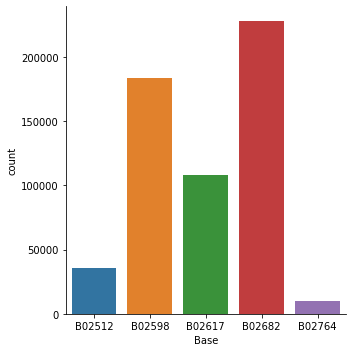

In [15]:
# Total rides based on the base code
sns.catplot(x='Base',data=uber, kind='count')

In [16]:
# creating pivot table
uber_week_data = uber.pivot_table(index=['DayofWeekNum','DayofWeek'], values ='Base',aggfunc='count')
uber_week_data

,,Base
DayofWeekNum,DayofWeek,
0,Monday,60861
1,Tuesday,91185
2,Wednesday,108631
3,Thursday,85067
4,Friday,90303
5,Saturday,77218
6,Sunday,51251


<AxesSubplot:xlabel='DayofWeekNum,DayofWeek'>

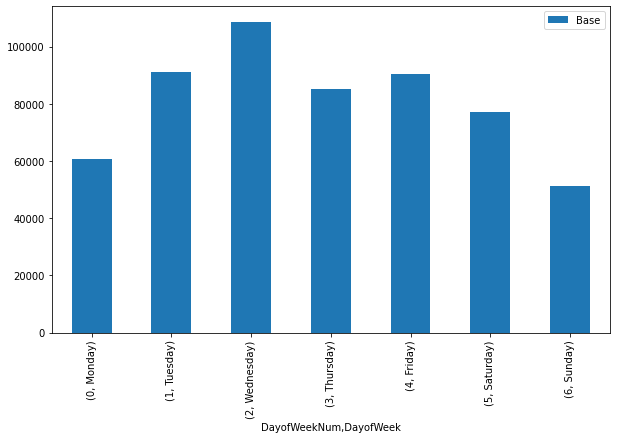

In [17]:
# visualize the pivot table
uber_week_data.plot(kind='bar',figsize=(10,6))

<AxesSubplot:title={'center':'Hourly Journeys'}, xlabel='HourofDay'>

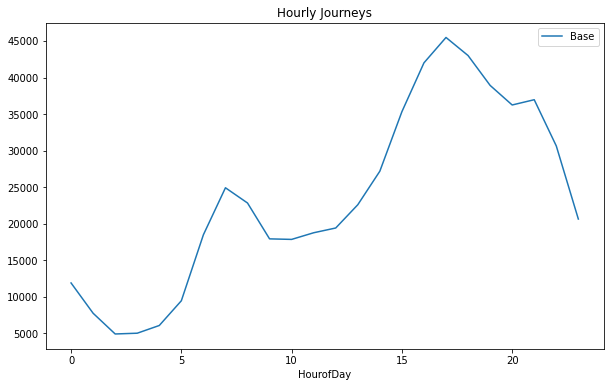

In [19]:
uber_hourly_data = uber.pivot_table(index=['HourofDay'], values='Base', aggfunc='count')
uber_hourly_data.plot(kind='line', figsize=(10,6), title="Hourly Journeys")

<AxesSubplot:title={'center':'Journey by DayNum'}, xlabel='DayNum'>

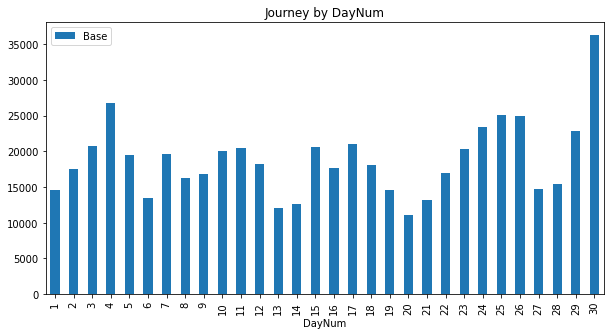

In [20]:
uber_day_data = uber.pivot_table(index=['DayNum'], values='Base', aggfunc='count')
uber_day_data.plot(kind='bar', figsize=(10,5), title="Journey by DayNum")

In [21]:
# counting the number of trips in each day in april

def count_rows(rows):
    return len(rows)

by_date= uber.groupby('DayNum').apply(count_rows)
by_date

DayNum
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

In [22]:
#  sort day of the month by values rather than date(ascending)

by_date_sorted= by_date.sort_values()
by_date_sorted

DayNum
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <BarContainer object of 24 artists>)

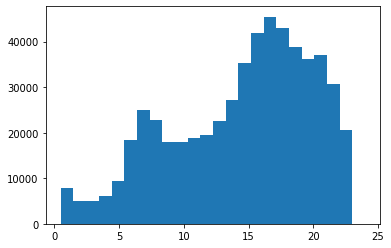

In [29]:
# Analyse the hours(pickups) using histogram 
plt.hist(uber.HourofDay, bins=24, range=(.5,24))

# histogram below is similar to the line graph above

In [30]:
# a cross table to analyse the bookings based on day of week and hour of day
count_rows(uber)
by_hour_weekday = uber.groupby('HourofDay DayofWeekNum'.split()).apply(count_rows).unstack()
by_hour_weekday

DayofWeekNum,0,1,2,3,4,5,6
HourofDay,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


<AxesSubplot:xlabel='DayofWeekNum', ylabel='HourofDay'>

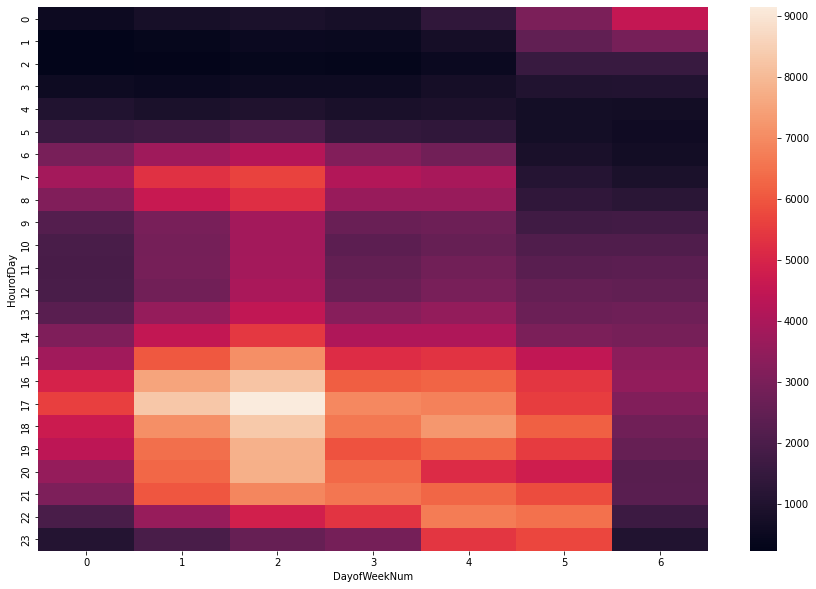

In [31]:
#  heatmap the brightest spot shows the day/hr with the highest frequency
plt.figure(figsize=(15,10))
sns.heatmap(by_hour_weekday)